<a href="https://colab.research.google.com/github/AdityaPDEU/Python/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install ucimlrepo

In [10]:
import ucimlrepo # install library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [6]:
# print number of datasets availiable
print(ucimlrepo.list_available_datasets())

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [13]:
# load the datasets
datasets = ucimlrepo.fetch_ucirepo(id=109) # if i change the id then we can collect any data from the repo
print(f"Metadata:{datasets.metadata}") # ya yasha data jo phala sa ha (it means it is a data of a data and you can fetch it as we want)
print(f"Features:{datasets.data.features.columns.tolist}")
print(f"Output:{datasets.data.targets.columns.tolist}") # which is class

Metadata:{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL'

In [14]:
X=pd.DataFrame(datasets.data.features)
Y=pd.DataFrame(datasets.data.targets)
data = pd.concat([X,Y], axis=1)


In [37]:
# print(datasets.data.targets[datasets.data.targets.columns.tolist()[0]].unique())

[1 2 3]


In [42]:
X=pd.DataFrame(datasets.data.features)
Y=pd.DataFrame(datasets.data.targets)
Y[Y.columns.tolist()[0]]. map({"M":1,"b":0})
data = pd.concat([X,Y], axis=1)


In [39]:
print(f"Info {data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [16]:
print(f"Desciption {data.describe()}")


Desciption           Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min 

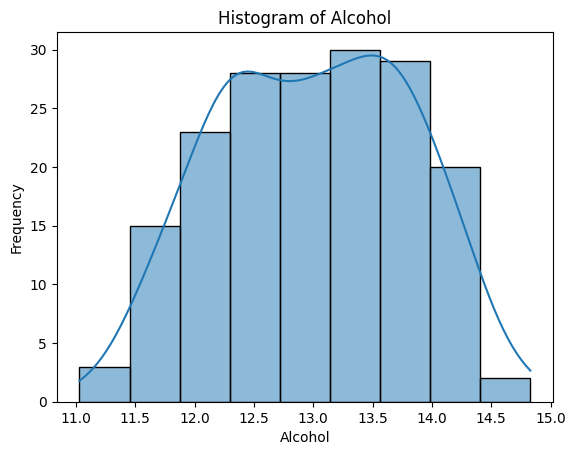

Skewness of Alcohol = -0.05104747165391963


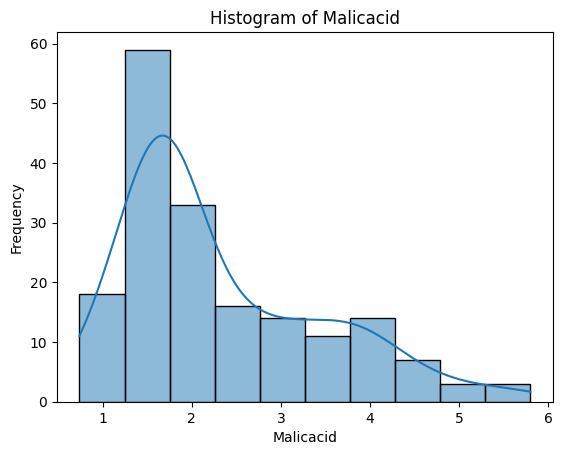

Skewness of Malicacid = 1.0308694978039965


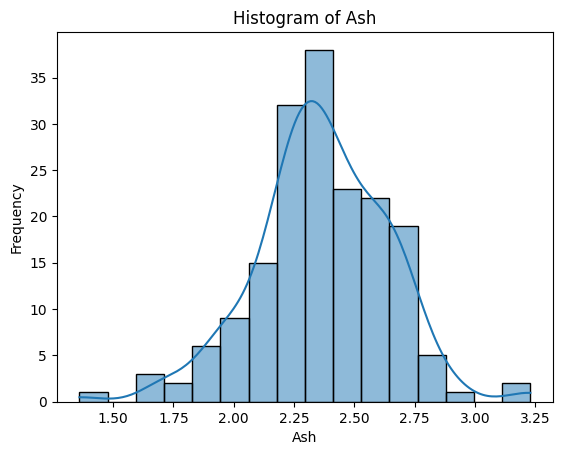

Skewness of Ash = -0.1752067779256028


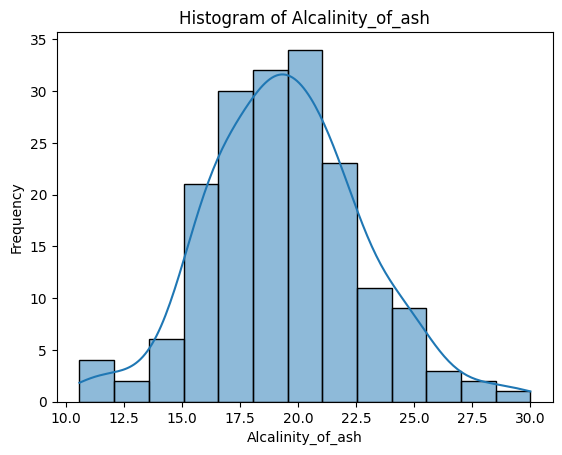

Skewness of Alcalinity_of_ash = 0.21124732832155219


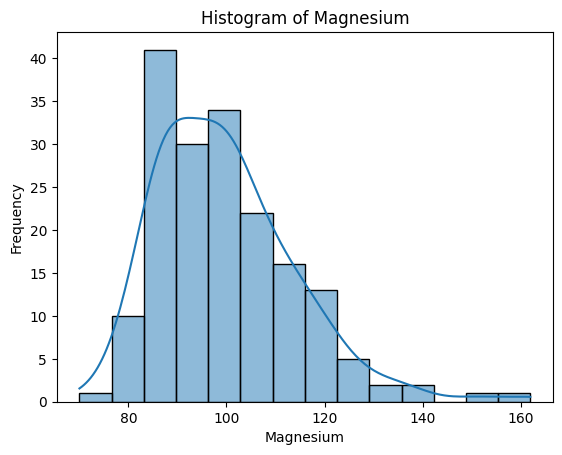

Skewness of Magnesium = 1.088914887210701


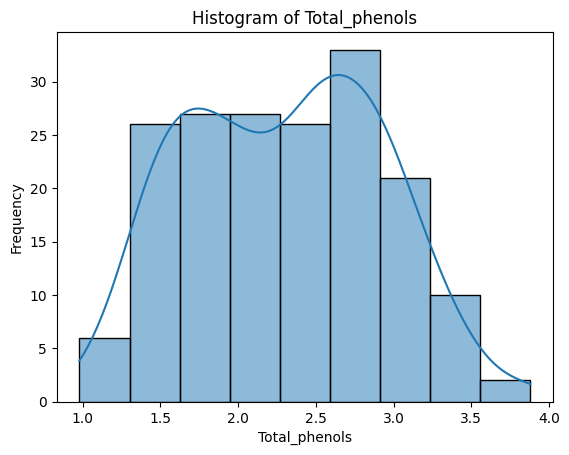

Skewness of Total_phenols = 0.08590677016719508


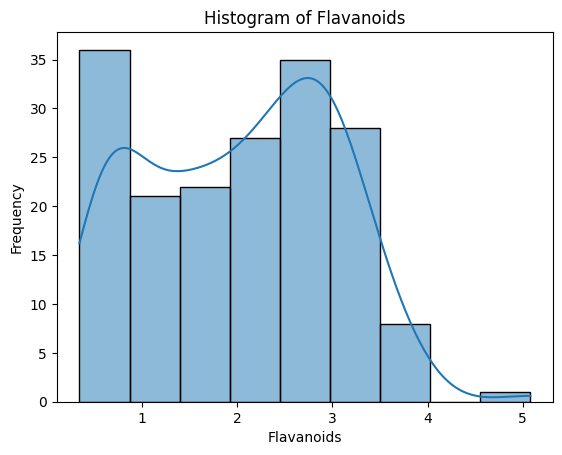

Skewness of Flavanoids = 0.025129482208428075


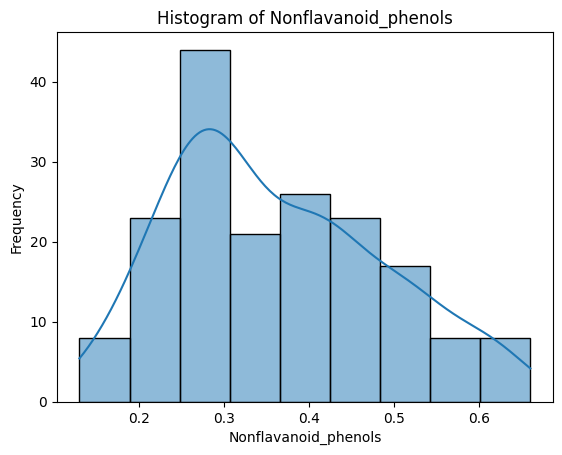

Skewness of Nonflavanoid_phenols = 0.44634901064702254


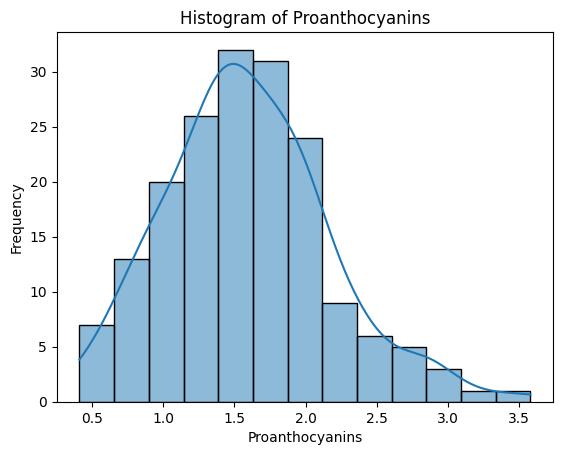

Skewness of Proanthocyanins = 0.5127690334109938


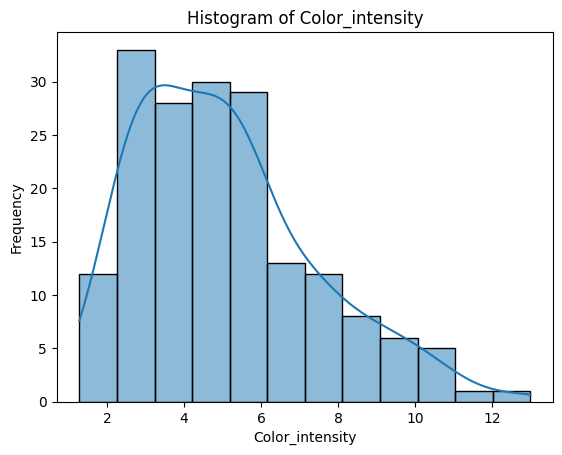

Skewness of Color_intensity = 0.8612480547740543


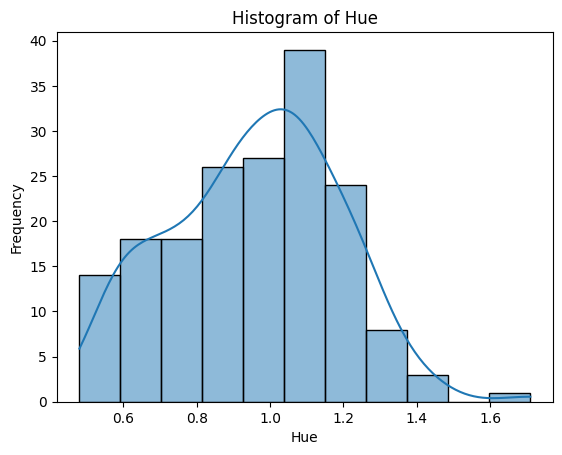

Skewness of Hue = 0.020913119068882775


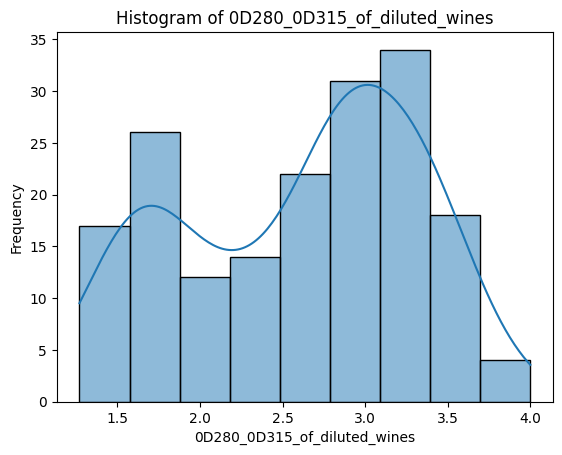

Skewness of 0D280_0D315_of_diluted_wines = -0.30468992894361013


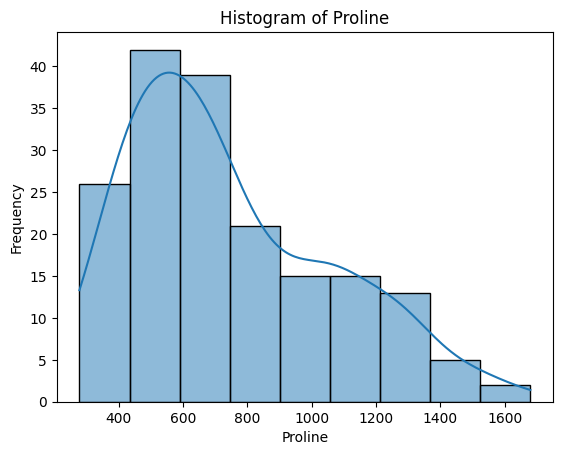

Skewness of Proline = 0.7613361671993626


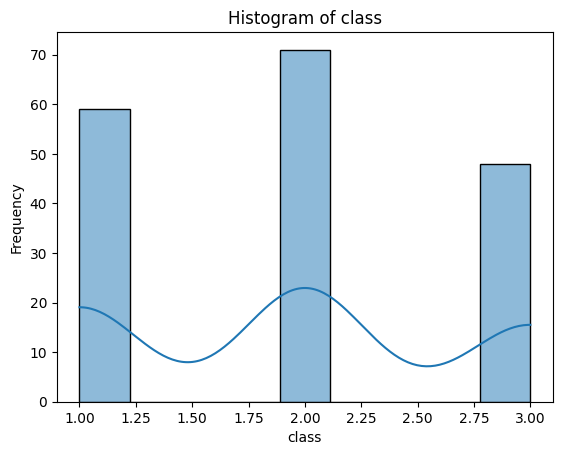

Skewness of class = 0.1065236775609526


In [17]:
# univariate analysis
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    plt.figure()
    sns.histplot(data[column],kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness of {column} = {skew(data[column])}")

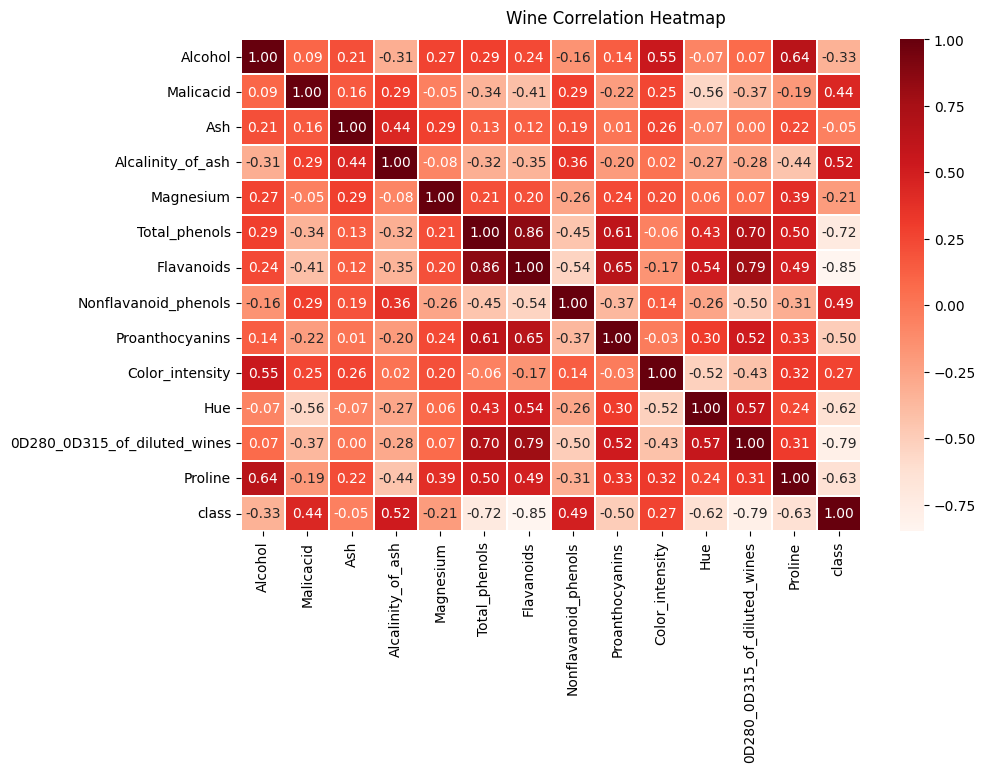

In [28]:
# correlation
fig, axs = plt.subplots(figsize=(10,6))
corr = datasets.data.original.corr()
hm = sns.heatmap(round(corr, 2),annot=True,ax=axs,cmap="Reds",fmt=".2f",linewidths=.05)
fig.subplots_adjust(top=0.93)
title = fig.suptitle("Wine Correlation Heatmap",fontsize=12)

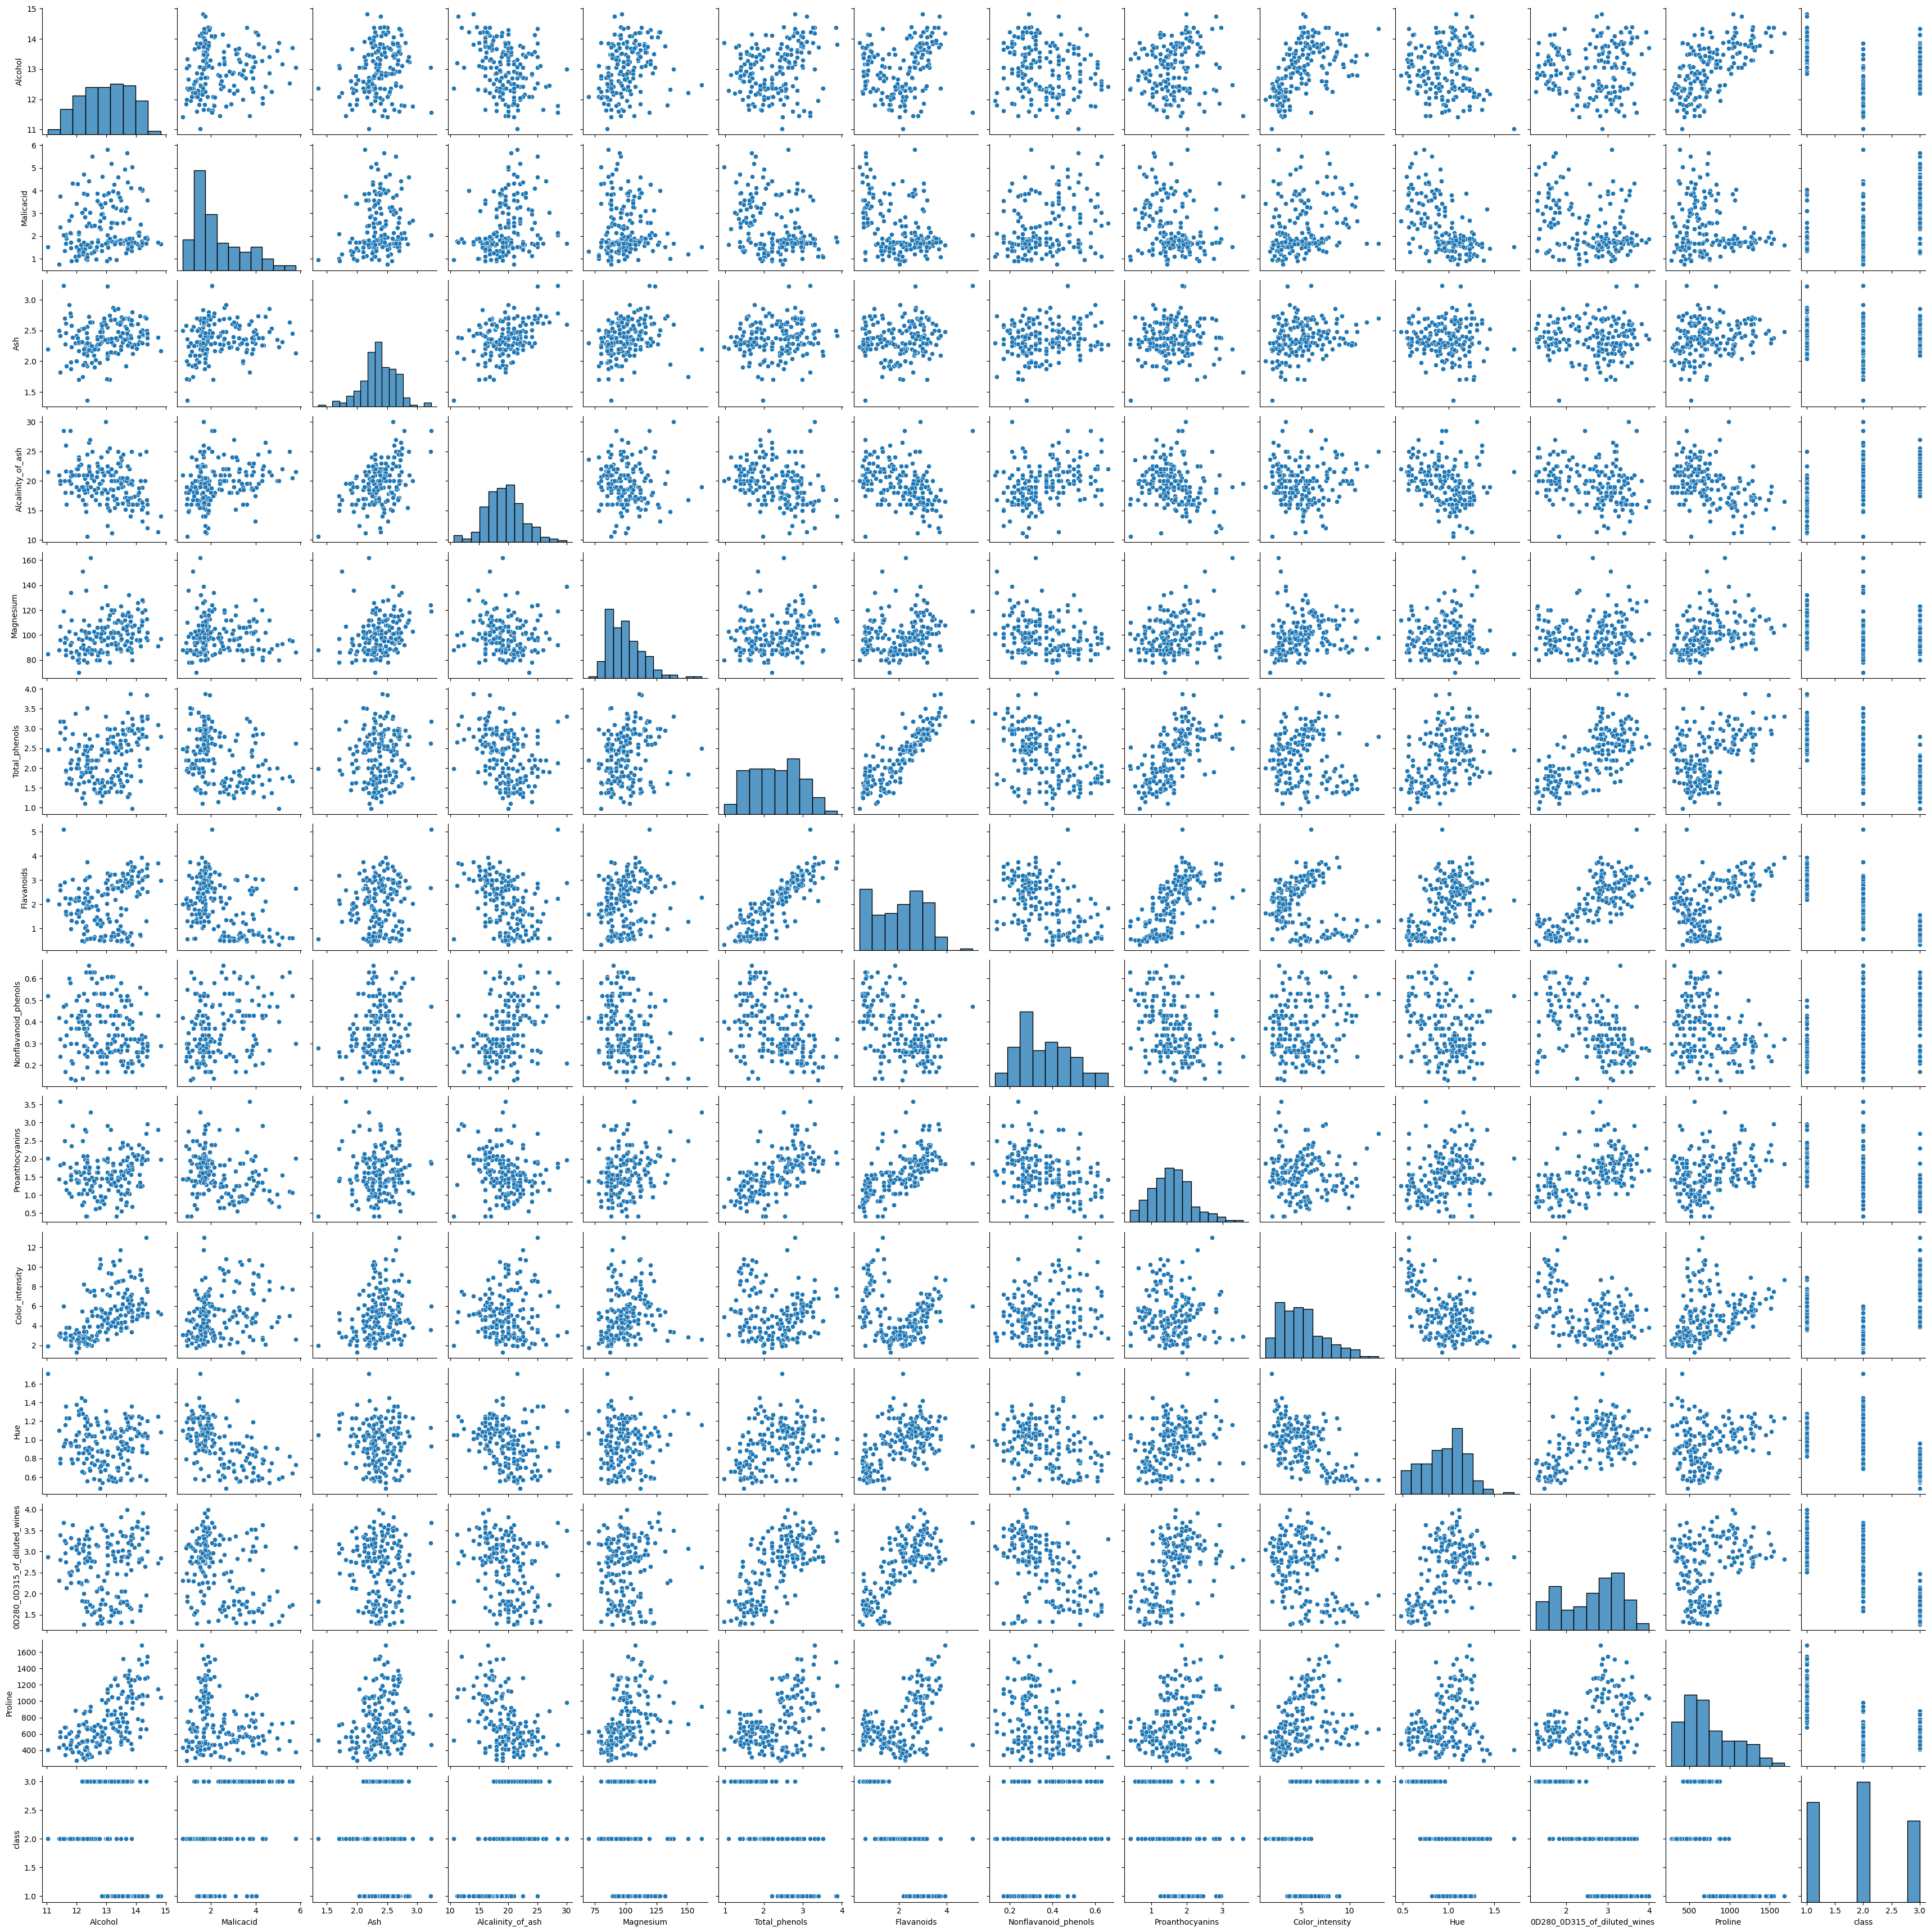

In [30]:
# Multivariate analysis
numeric_data=data.select_dtypes(include =[int,float])
sns.pairplot(numeric_data)
plt.show()

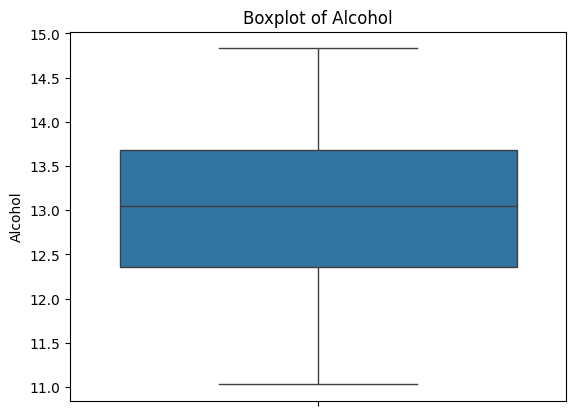

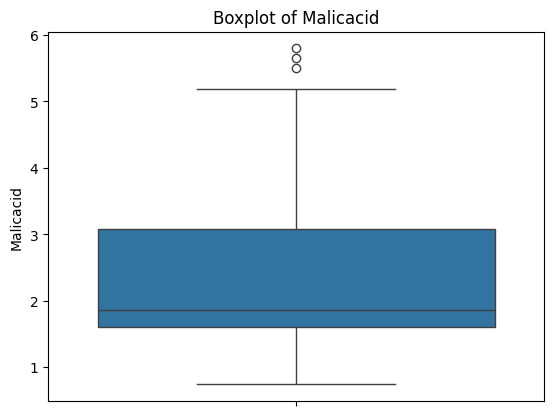

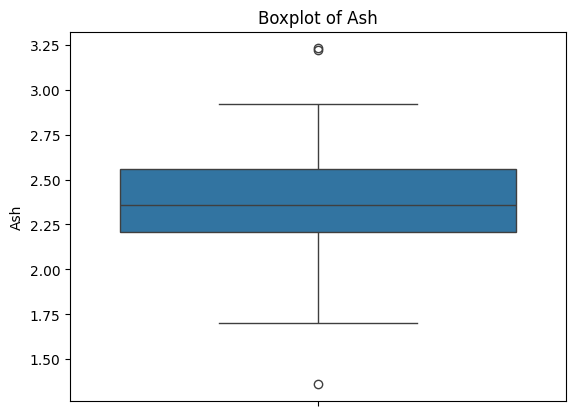

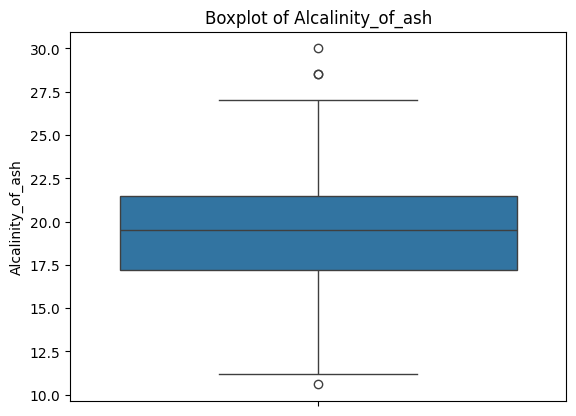

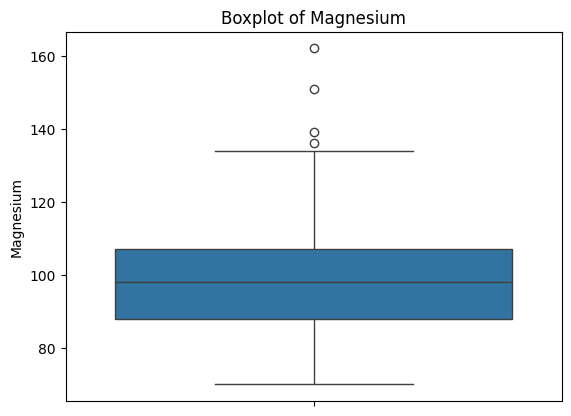

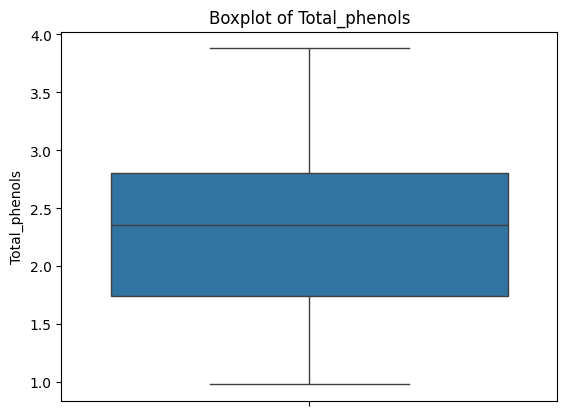

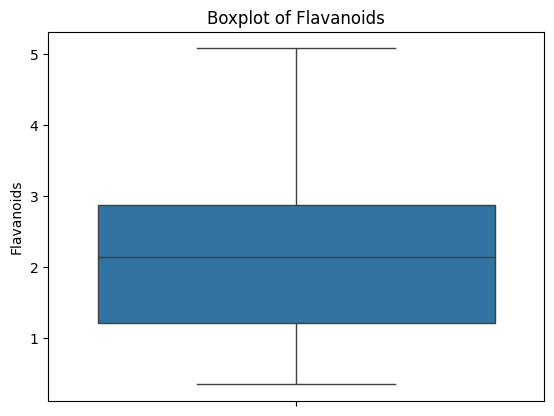

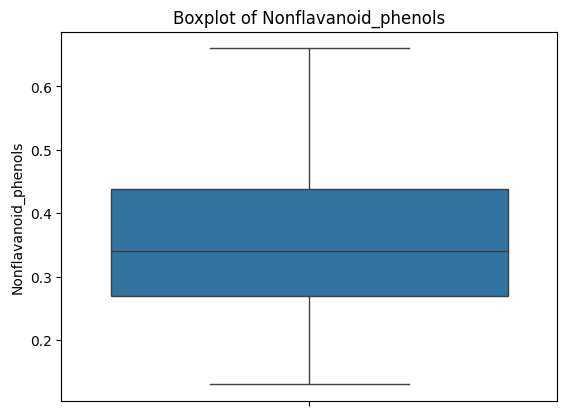

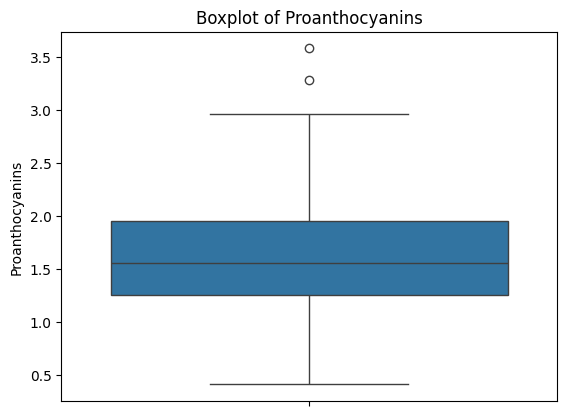

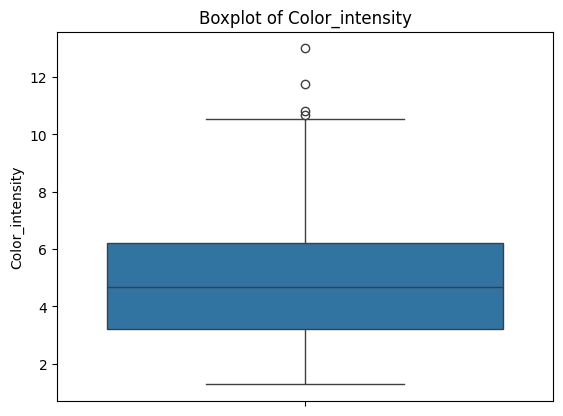

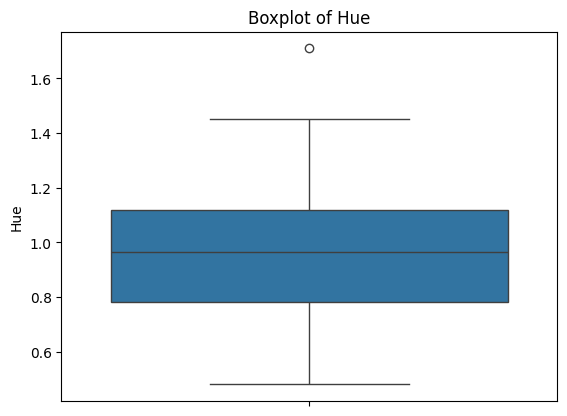

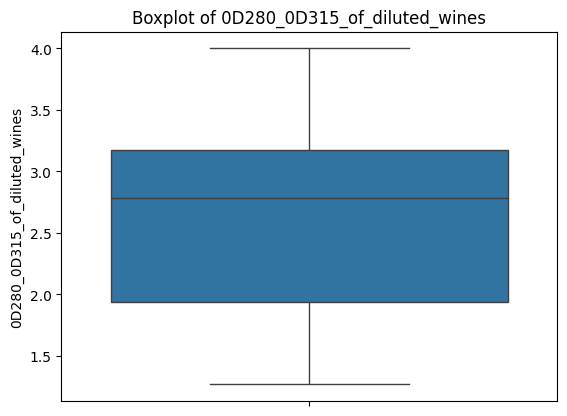

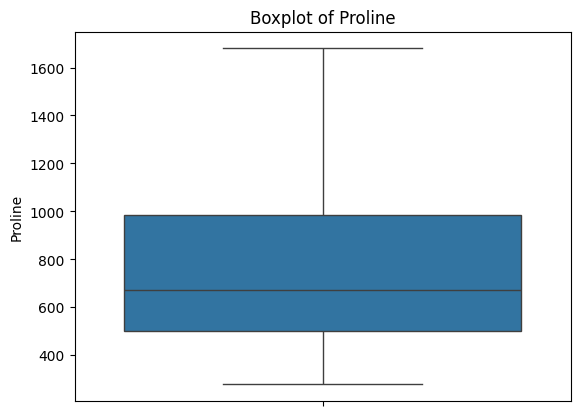

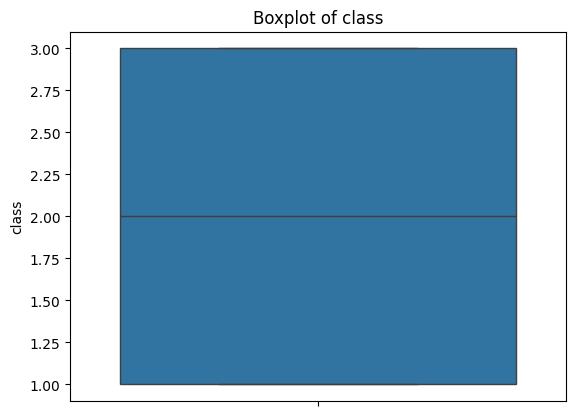

In [32]:
# outlier detection
for column in numeric_data.columns:
  plt.figure()
  sns.boxplot(y=numeric_data[column])
  plt.title(f"Boxplot of {column}")
  plt.ylabel(column)
  plt.show()
    # if pd.api.types.is_numeric_dtype(numeric_data[column]):
    # plt.figure()
    # sns.boxplot(numeric_data[column])
    # plt.title(f"Boxplot of {column}")

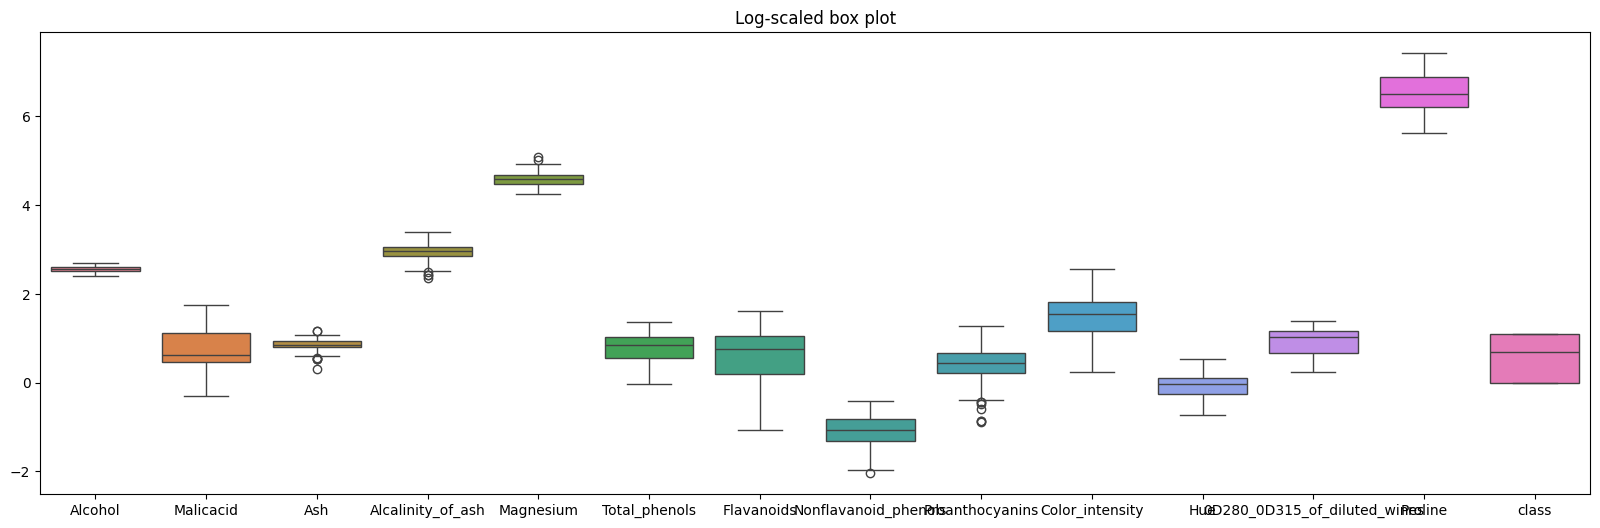

In [36]:
#  box plot with log values
plt.figure(figsize=(20,6))
sns.boxplot(data=numeric_data.apply(np.log)) # try to use with scipy
plt.title("Log-scaled box plot")
plt.show()

In [43]:
datasets = ucimlrepo.fetch_ucirepo(id=17)
print(f"Metadata:{datasets.metadata}")
print(f"Features:{datasets.data.features.columns.tolist}")
print(f"Output:{datasets.data.targets.columns.tolist}")

Metadata:{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 

In [44]:
a=pd.DataFrame(datasets.data.features)
b=pd.DataFrame(datasets.data.targets)
data = pd.concat([a,b], axis=1)

In [63]:
print(datasets.data.targets[datasets.data.targets.columns.tolist()[0]].unique())

['M' 'B']


In [69]:
a=pd.DataFrame(datasets.data.features)
b=pd.DataFrame(datasets.data.targets)
b[b.columns.tolist()[0]] = b[b.columns.tolist()[0]].map({"M":1, "B":0})
data = pd.concat([a,b], axis=1)

In [70]:
print(f"Info {data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

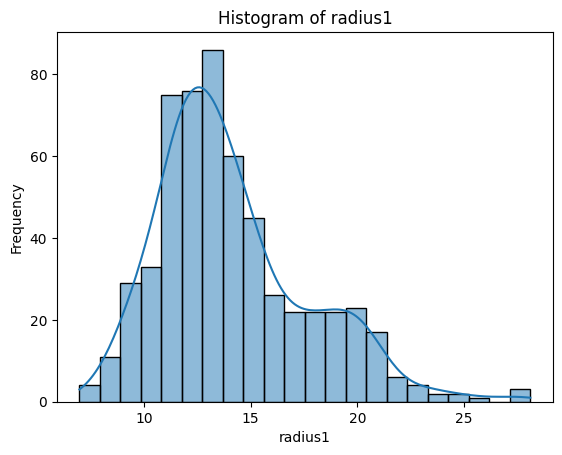

Skewness of radius1 = 0.9398934455576345


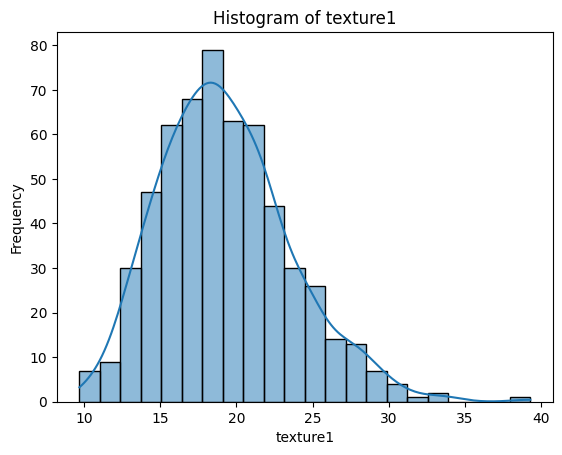

Skewness of texture1 = 0.6487335672867015


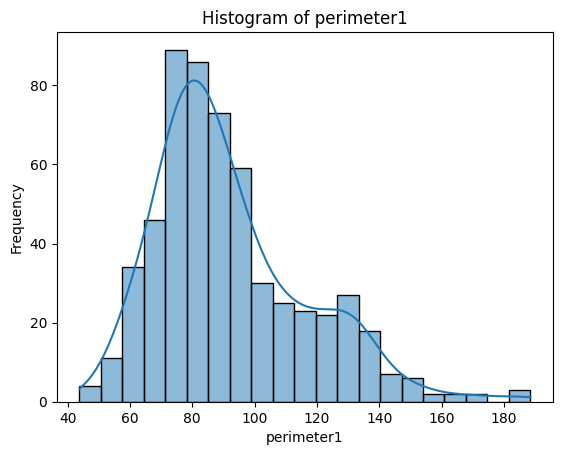

Skewness of perimeter1 = 0.9880369541677213


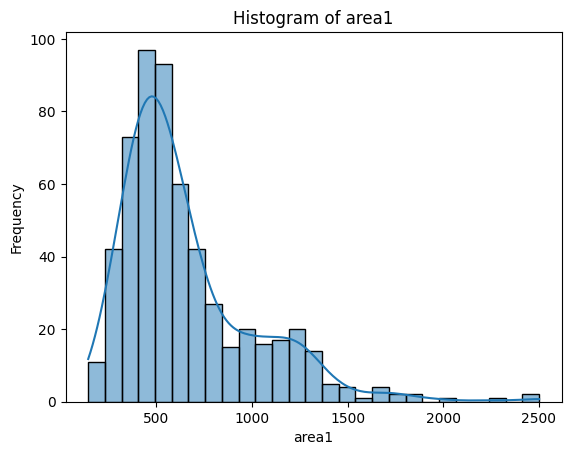

Skewness of area1 = 1.6413905092044112


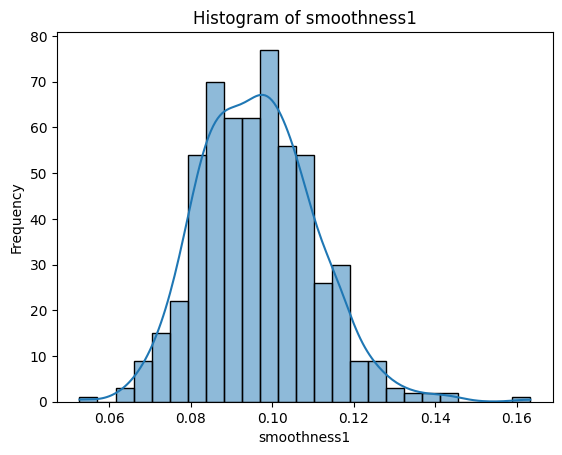

Skewness of smoothness1 = 0.4551199203571718


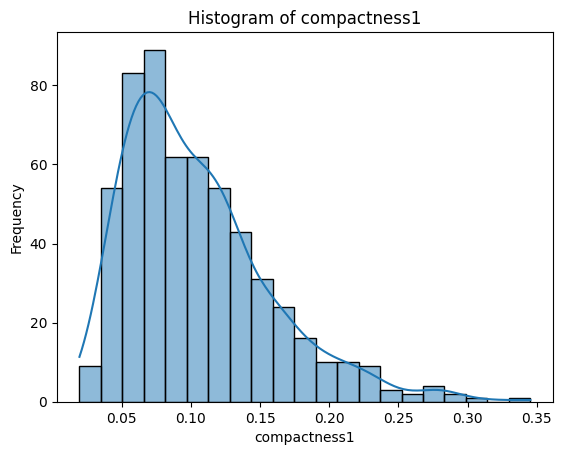

Skewness of compactness1 = 1.186983323974523


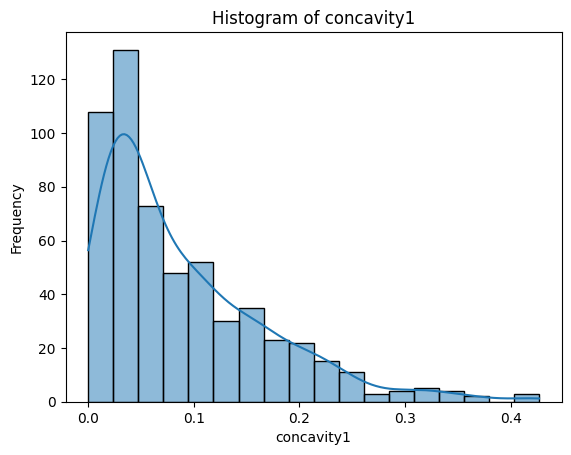

Skewness of concavity1 = 1.3974832352826647


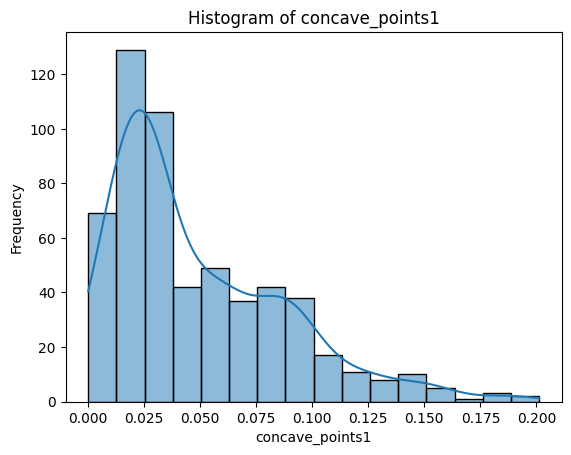

Skewness of concave_points1 = 1.1680903481012583


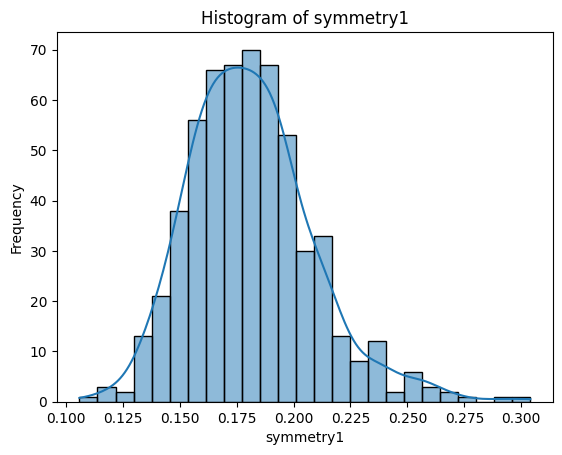

Skewness of symmetry1 = 0.7236947177154984


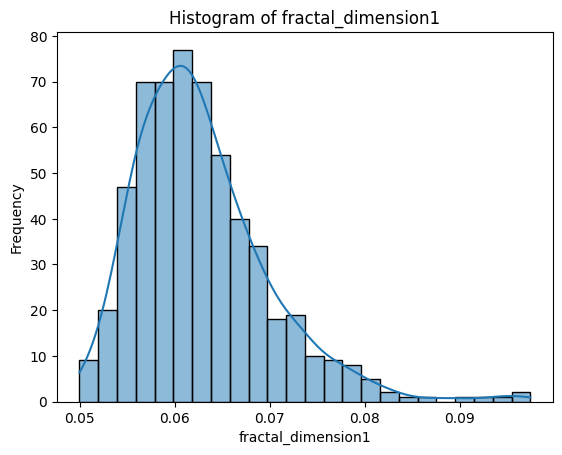

Skewness of fractal_dimension1 = 1.3010473927890858


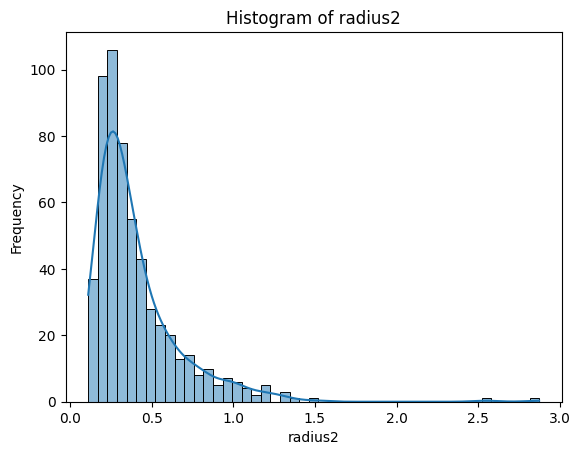

Skewness of radius2 = 3.080463985335206


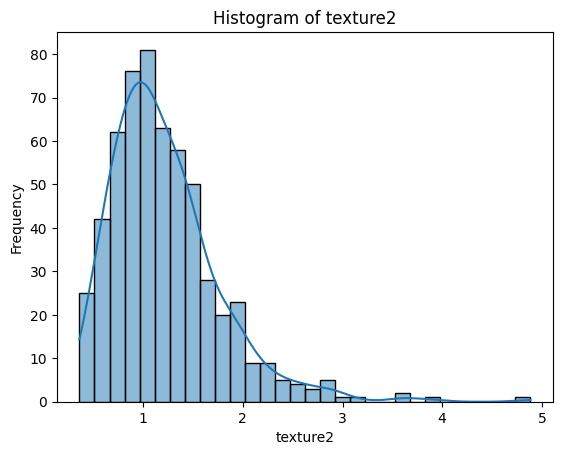

Skewness of texture2 = 1.6421002649479612


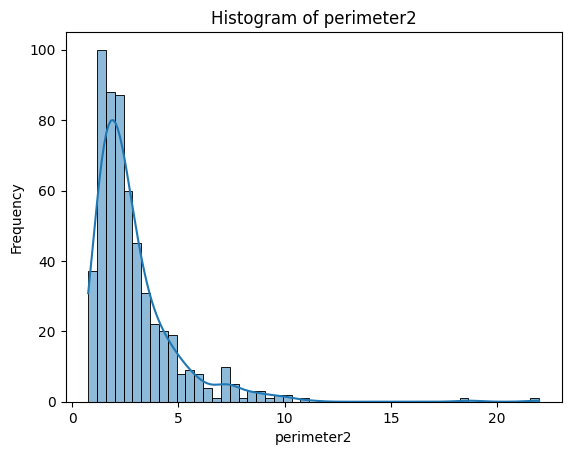

Skewness of perimeter2 = 3.4345304746147067


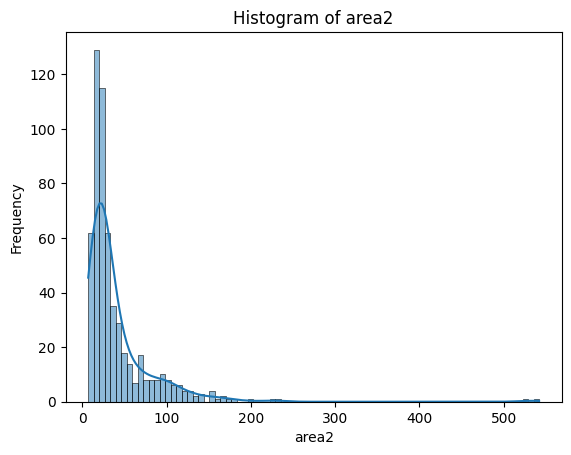

Skewness of area2 = 5.432815862951913


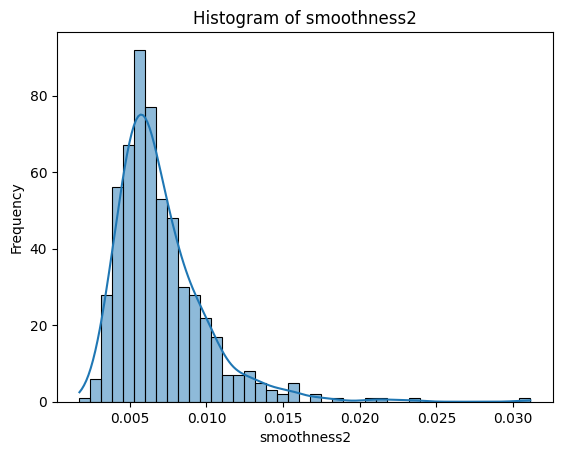

Skewness of smoothness2 = 2.308344221045982


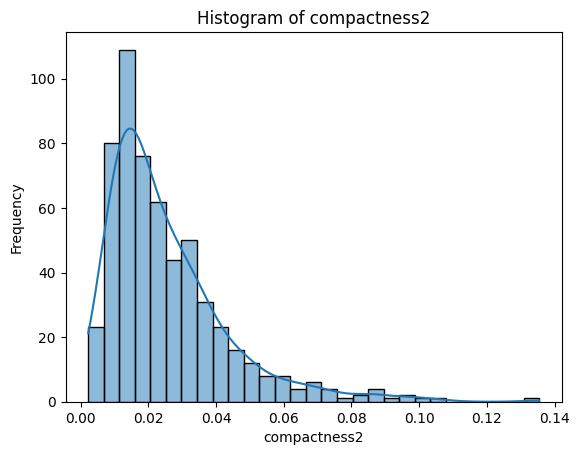

Skewness of compactness2 = 1.8972023914083855


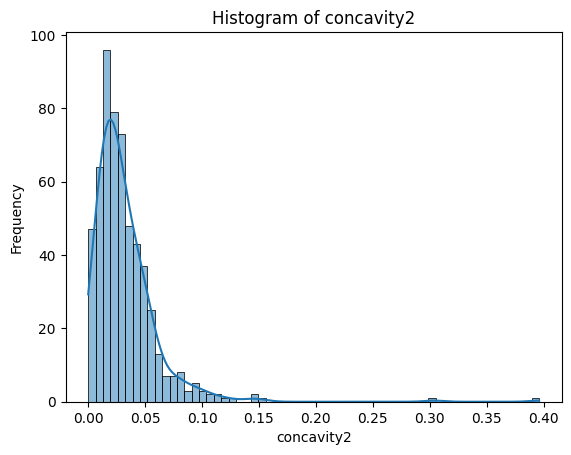

Skewness of concavity2 = 5.096980949017036


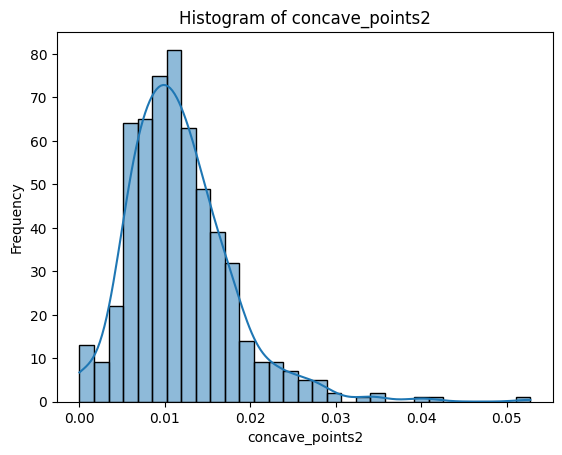

Skewness of concave_points2 = 1.4408668862916998


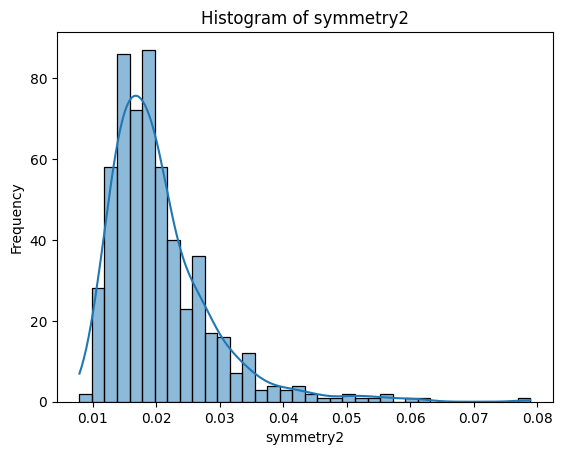

Skewness of symmetry2 = 2.189341838925834


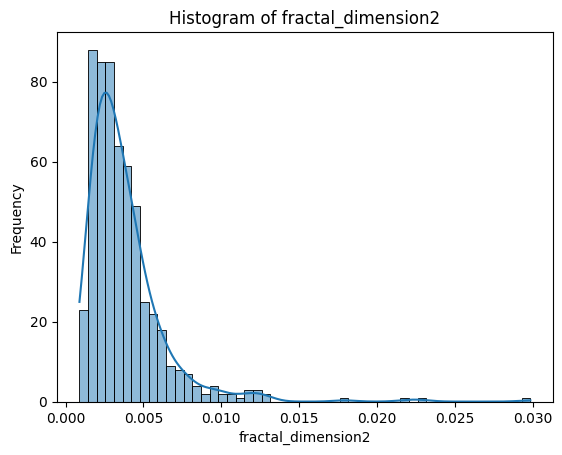

Skewness of fractal_dimension2 = 3.913616654675261


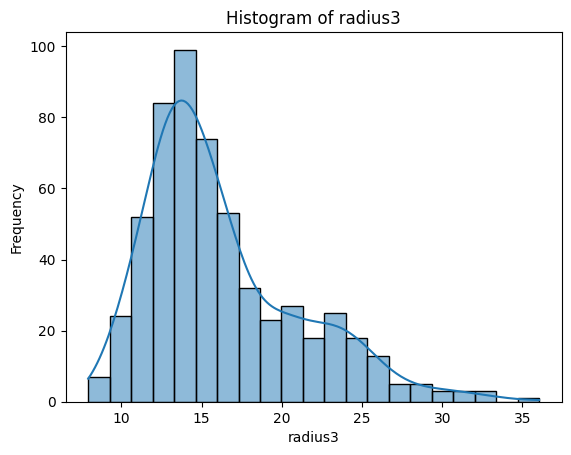

Skewness of radius3 = 1.1002050372722139


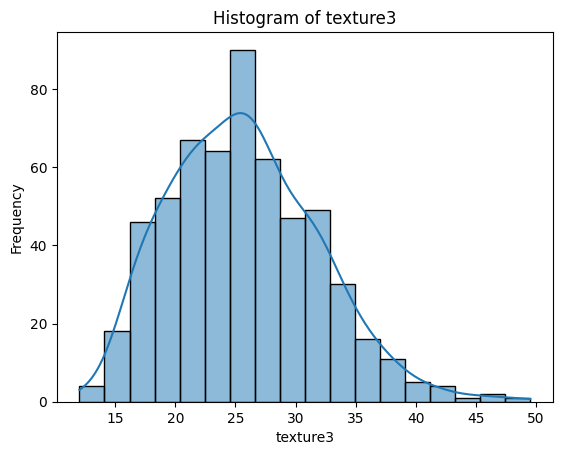

Skewness of texture3 = 0.4970066697616781


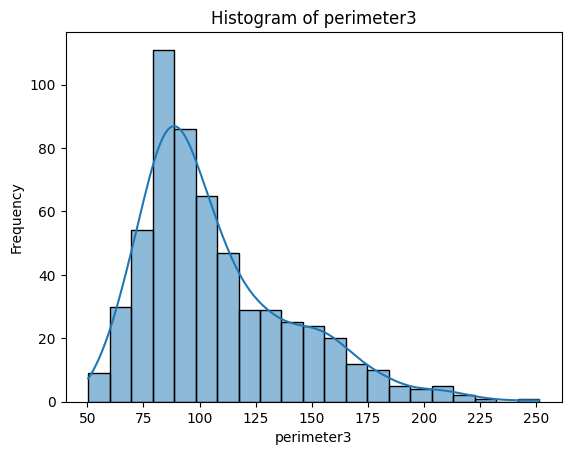

Skewness of perimeter3 = 1.1251876208771259


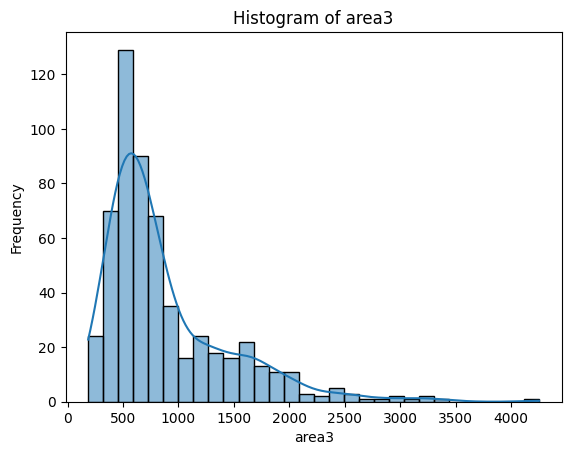

Skewness of area3 = 1.8544679916096252


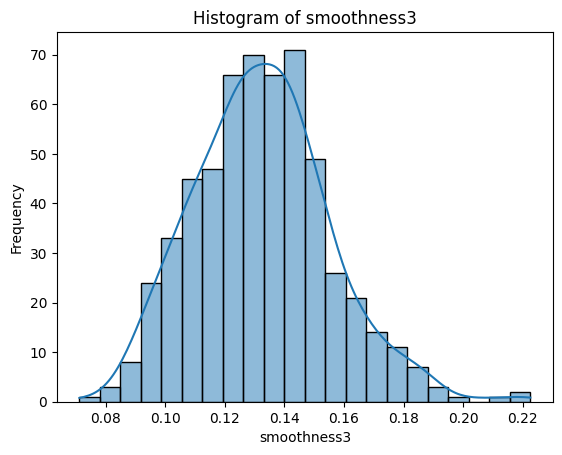

Skewness of smoothness3 = 0.41433004572343024


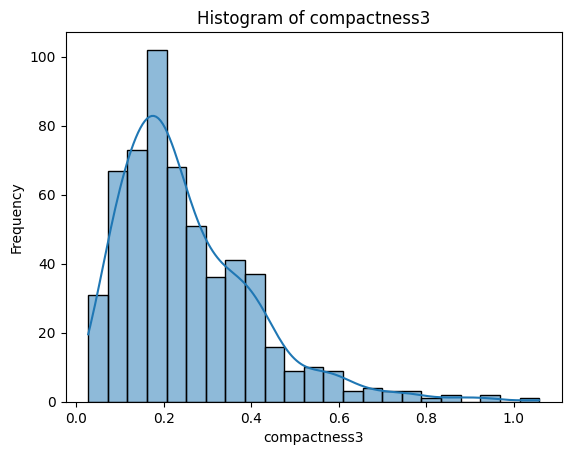

Skewness of compactness3 = 1.4696674610957545


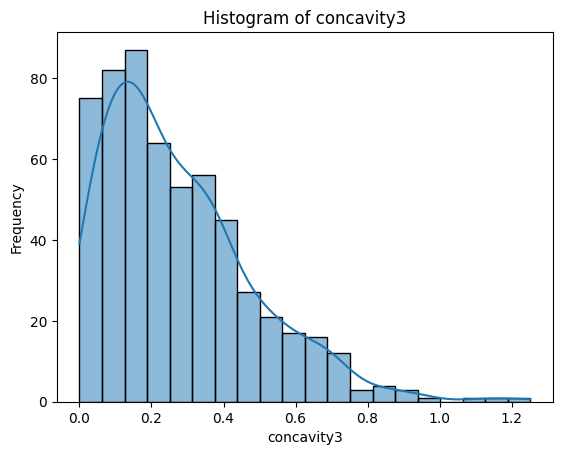

Skewness of concavity3 = 1.147202339994203


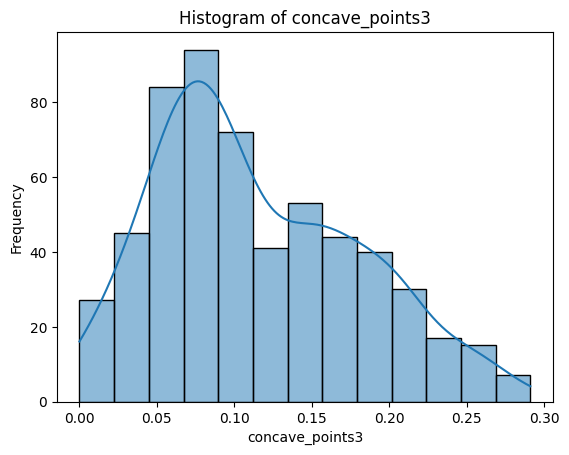

Skewness of concave_points3 = 0.4913159397943974


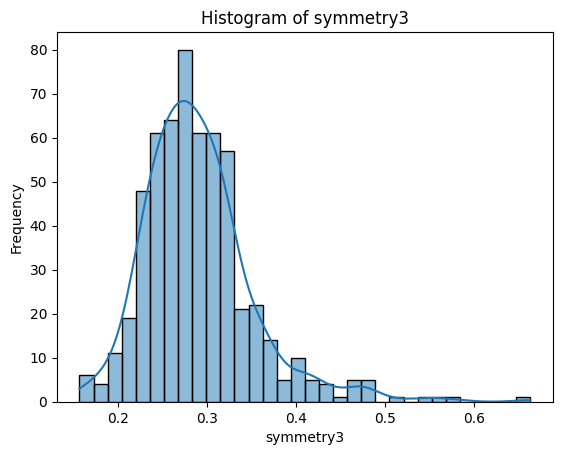

Skewness of symmetry3 = 1.4301448677540645


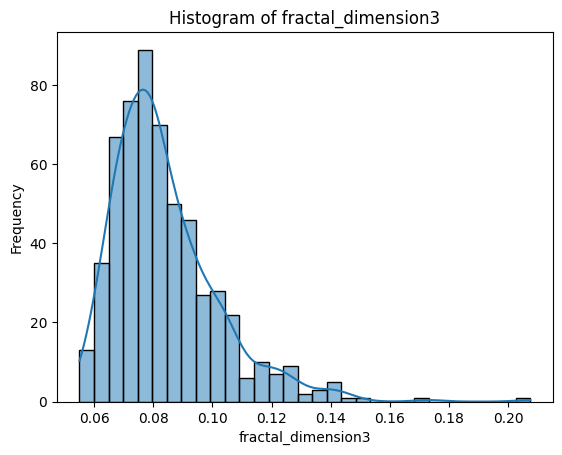

Skewness of fractal_dimension3 = 1.658193155047751


In [50]:
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    plt.figure()
    sns.histplot(data[column],kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness of {column} = {skew(data[column])}")

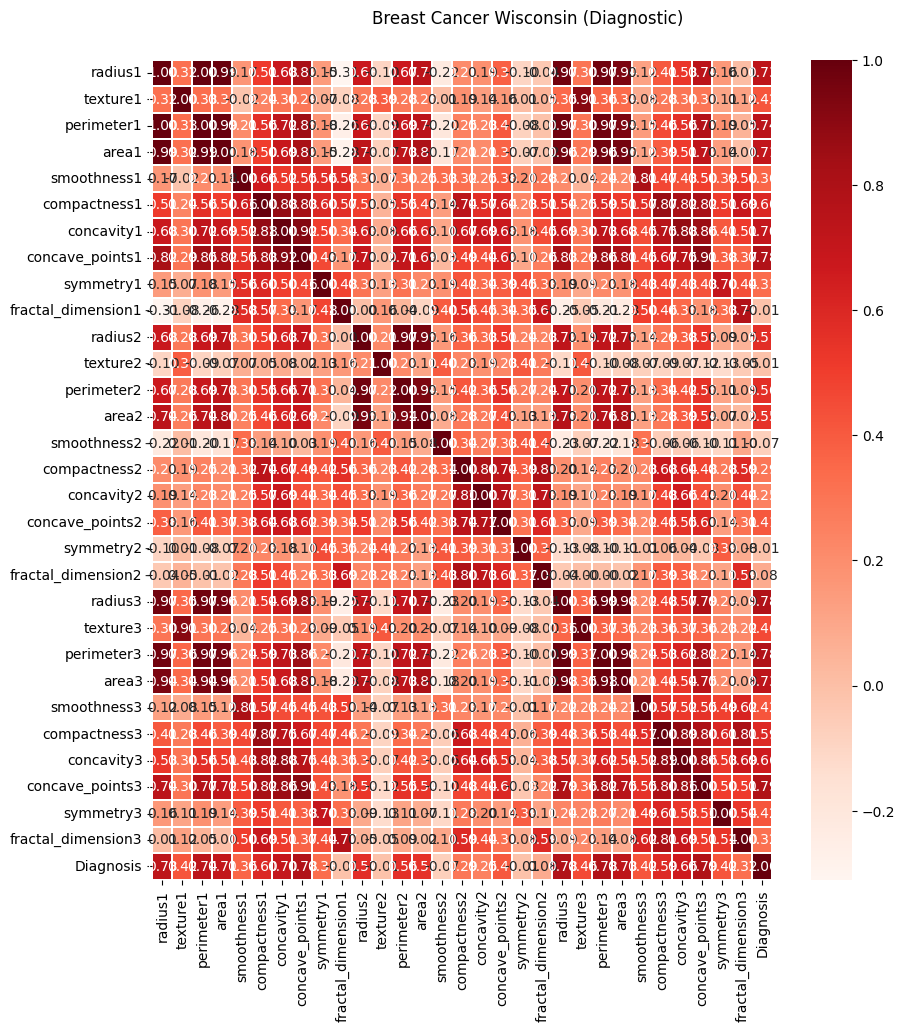

In [73]:
fig, axs = plt.subplots(figsize=(10,10))
corr = data.corr()
hm = sns.heatmap(round(corr, 2),annot=True,ax=axs,cmap="Reds",fmt=".2f",linewidths=.05)
fig.subplots_adjust(top=0.93)
title = fig.suptitle("Breast Cancer Wisconsin (Diagnostic)",fontsize=12)

